## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = pd.read_csv('./data/digit/train.csv')
test = pd.read_csv('./data/digit/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

## Визуализируем исходные данные

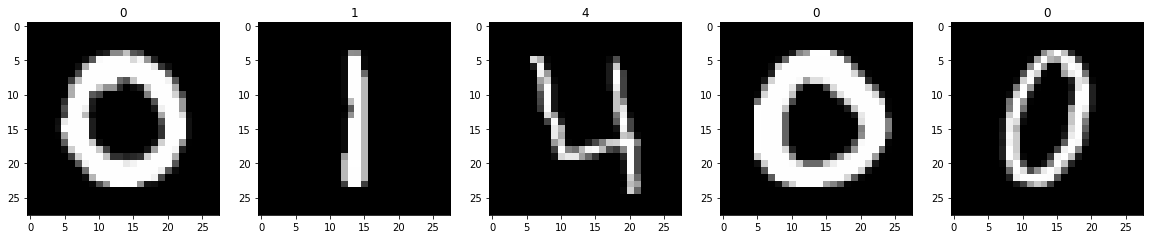

In [5]:
label = train['label'] 
train.drop('label', axis=1, inplace=True) 

fig = plt.figure(figsize=(20, 10))

for i in range(1, 6):
    subplot = fig.add_subplot(1, 5, i)
    grid_data = np.array(train.iloc[i]).reshape (28,28) 
    plt.imshow(grid_data, interpolation=None, cmap='gray')
    subplot.set_title('%s' % label[i]);
    
plt.show()   

## Нормализуем данные с помощью  StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_train = scaler.fit_transform(train)
std_train.shape

(42000, 784)

## Разбиваем выборку на обучение и валидацию

In [7]:
from sklearn.model_selection import train_test_split

y_train, y_val, x_train, x_val = train_test_split(
    label, std_train, test_size=0.2, random_state=42)

## Понижаем размерность тренировочной выборки с помощью PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=(150))    
x_train = pca.fit_transform(x_train)

In [9]:
x_train.shape

(33600, 150)

## Понижаем размерность валидационной выборки

In [10]:
x_val = pca.transform(x_val)

x_val.shape

(8400, 150)

## Строим модель RandomForest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
def fit_model(X_train, y_train, X_test, y_test, params, print_res=False):    
    model = RandomForestClassifier(**params)
    
    model.fit(X_train, y_train)
    pred_values_train = model.predict(X_train)
    pred_values_test = model.predict(X_test)
    
    if print_res:    
        print('TRAIN')
        print('Accuracy: %s' % accuracy_score(y_train, pred_values_train))
        print()
        print('VAL')
        print('Accuracy: %s' % accuracy_score(y_test, pred_values_test))
        
    return model

In [19]:
params = {
    'n_estimators': 16,
    'criterion': 'gini',
    'max_depth': 15,
    'min_samples_leaf': 5    
}

In [28]:
model = fit_model(x_train, y_train, x_val, y_val, print_res=True, params=params)

TRAIN
Accuracy: 0.9788095238095238

VAL
Accuracy: 0.9198809523809524


## Предсказания на тестовых данных

In [23]:
std_test = scaler.fit_transform(test)

In [24]:
test_pca = pca.transform(std_test)

In [25]:
test_pca.shape

(28000, 150)

In [29]:
pred_test = model.predict(test_pca)

In [35]:
pred_test

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

## Визуализируем предсказания

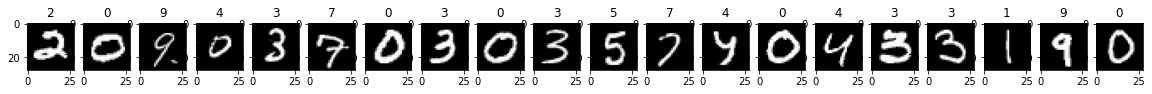

In [39]:
fig = plt.figure(figsize=(20, 10))

for i in range(1, 21):
    subplot = fig.add_subplot(1, 20, i)
    grid_data = np.array(test.iloc[i-1]).reshape (28,28) 
    plt.imshow(grid_data, interpolation=None, cmap='gray')
    subplot.set_title('%s' % pred_test[i-1]);
    
plt.show()   

## Готовим файл для отправки

In [40]:
with open('submit_res.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [41]:
%%bash

head submit_res.txt

ImageId,Label
1,2
2,0
3,9
4,4
5,3
6,7
7,0
8,3
9,0


### Результат на Kaggle 0.91 http://joxi.ru/a2XLbq9UlXJ9N2